# Plot of caffeine metabolism 

Pathway Expansion based on Liu et al, 2021; Zhao et al, 2024.

This demonstrates that new metabolites/reactions can be added to a pathway easily.

In [1]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("/Users/lish/li.github/Li_CVK/lcvk")
from metModels import *
from polarPlot import *

## Notes
**KEGG**
https://www.kegg.jp/pathway/hsa00232
https://www.kegg.jp/module/M00915

Compound	Name
C07481	Caffeine
C13747	1,7-Dimethylxanthine
C16353	7-Methylxanthine
C07480	Theobromine
C00385	Xanthine

**Zhao2024**
Compound	Name
C07481	Caffeine    C8H10N4O2
C13747    Paraxanthine  C7H8N4O2
    Theophylline    C7H8N4O2    Theobromine ->
    1,3,7-Trimethyluric acid    C8H10N4O3   Caffeine -> 
C00385	Xanthine    C5H4N4O2

    1-Methylxanthine    C6H6N4O2    Paraxanthine ->
    1-Methyluric acid   C6H6N4O3    1-Methylxanthine ->

C16353	7-Methylxanthine    C6H6N4O2
    AAMU    C7H10N4O3
    AFMU    C8H10N4O4

    3,6,8-Trimethylallantoin    C7H12N4O3   1,3,7-Trimethyluric acid ->

    1,3,7-Trimethyl-5-hydroxyisourate   C8H10N4O4

1,3,7-Trimethyldihydrourate C8H12N4O3 Caffeine ->


In [10]:
zhao2024 = '''Caffeine    C8H10N4O2
Paraxanthine    C7H8N4O2
Theophylline    C7H8N4O2
1,3,7-Trimethyluric acid    C8H10N4O3
Xanthine    C5H4N4O2
1-Methylxanthine    C6H6N4O2
1-Methyluric acid    C6H6N4O3
7-Methylxanthine    C6H6N4O2
AAMU    C7H10N4O3
AFMU    C8H10N4O4
3,6,8-Trimethylallantoin    C7H12N4O3
1,3,7-Trimethyl-5-hydroxyisourate    C8H10N4O4'''
ken = {'name': '1,3,7-Trimethyldihydrourate', 'formula': 'C8H12N4O3'}
Theobromine = {'name': 'Theobromine', 'formula': 'C7H8N4O2'}  # not measured in Zhao et al 2024


In [11]:
metabolites = []
for line in zhao2024.splitlines():
    name, fm = line.rstrip().split('    ')
    metabolites.append({
        'name': name, 'formula': fm
    })

In [30]:
# source -> target
rxnList = '''Caffeine    Paraxanthine
Paraxanthine    7-Methylxanthine
Paraxanthine    1-Methylxanthine
1-Methylxanthine    1-Methyluric acid
Paraxanthine    AFMU
AFMU    AAMU
Theobromine    7-Methylxanthine
Theobromine    Theophylline
Caffeine    Theobromine
7-Methylxanthine    Xanthine
Caffeine    1,3,7-Trimethyluric acid
1,3,7-Trimethyluric acid    1,3,7-Trimethyl-5-hydroxyisourate
1,3,7-Trimethyl-5-hydroxyisourate    3,6,8-Trimethylallantoin
1,3,7-Trimethyluric acid    3,6,8-Trimethylallantoin
Caffeine    1,3,7-Trimethyldihydrourate'''
edges = []
for line in rxnList.splitlines():
    n1, n2 = line.rstrip().split('    ')
    edges.append((n1, n2))

In [26]:
metabolites.append(Theobromine)
metabolites.append(ken)

In [27]:
for x in metabolites:
    x['id'] = x['name']

In [15]:
edges

[('Caffeine', 'Paraxanthine'),
 ('Paraxanthine', '7-Methylxanthine'),
 ('Paraxanthine', '1-Methylxanthine'),
 ('1-Methylxanthine', '1-Methyluric acid'),
 ('Paraxanthine', 'AFMU'),
 ('AFMU', 'AAMU'),
 ('Theobromine', '7-Methylxanthine'),
 ('Theobromine', 'Theophylline'),
 ('Caffeine', 'Theobromine'),
 ('7-Methylxanthine', 'Xanthine'),
 ('Caffeine', '1,3,7-Trimethyluric acid'),
 ('1,3,7-Trimethyluric acid', '3,6,8-Trimethylallantoin'),
 ('Caffeine', '1,3,7-Trimethyldihydrourate')]

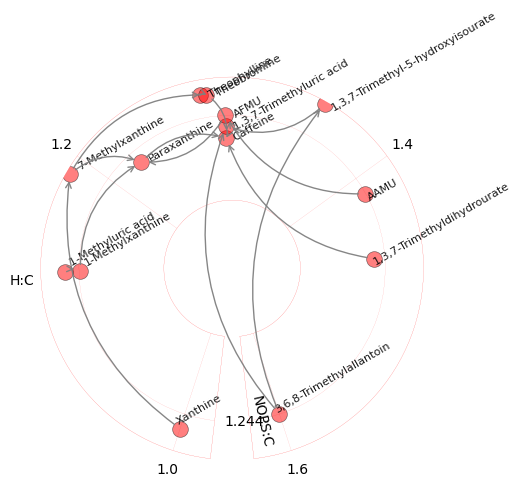

In [37]:
cplot_LCVK_pathway(metabolites, edges, formula='formula', cpd_name='name',
                    title='',  ydata='ratio_NOPS', 
                    width=5, height=5, 
                    rotation=30, show_names=True, yLabel_off=False, 
                    max_radius=2, fontsize=8,
                    marker='o', facecolors='r', linewidths=.5, edgecolors='k', s=128, 
                    edge_alpha=0.95,
                    optimization=True, padding=0.2, 
                    optimization_spacer=0.5, optimization_iter=5,
                    outfile= '../output/caffeine_metabolism__.pdf')

In [79]:
pathway_nodes, pathway_edges = calculate_clean_network(metabolites, edges, formula, 
                                                        5)
hcList = [x['ratio_H_C'] for x in pathway_nodes]
cartesian_mean_x, cartesian_min_x, cartesian_max_x = np.mean(hcList), min(hcList), max(1, max(hcList))
# hcList = standardize_data(hcList)
hcList = project_hc_data_radial(hcList)


In [44]:
[x['name'] for x in pathway_nodes]

['Caffeine',
 'Paraxanthine',
 'Theophylline',
 '1,3,7-Trimethyluric acid',
 'Xanthine',
 '1-Methylxanthine',
 '1-Methyluric acid',
 '7-Methylxanthine',
 'AAMU',
 'AFMU',
 '3,6,8-Trimethylallantoin',
 '1,3,7-Trimethyl-5-hydroxyisourate',
 'Theobromine',
 '1,3,7-Trimethyldihydrourate']

In [ ]:
offset = .1
hcList[9] += offset
hcList[2] += offset
hcList[1] -= offset
hcList[5] -= offset
hcList[6] += offset


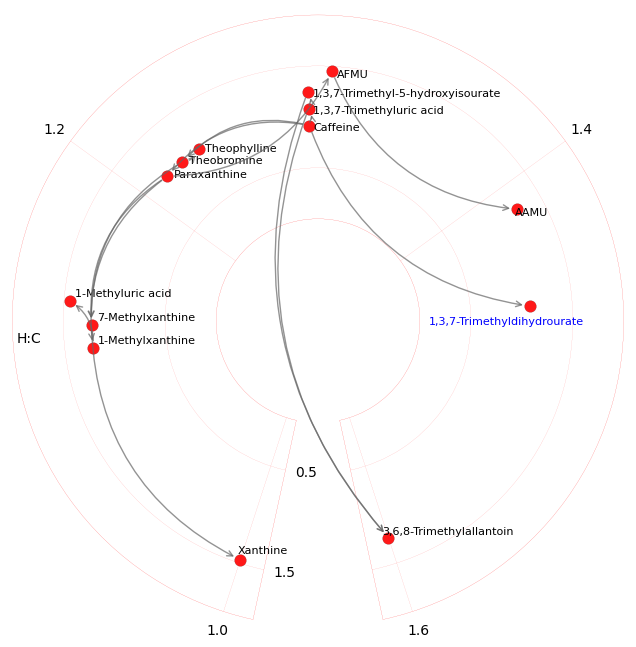

In [105]:
# Go manual
formula='formula' 
cpd_name='name'
width, height =8, 8
min_theta, max_theta =0.1*np.pi, 1.9*np.pi
padding = 0.01
fontsize = 8
rotation = 0

# tick labels; showing original data before polar projection 
xlabels = [ 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
xlabels = [x for x in xlabels if cartesian_min_x < x < cartesian_max_x]
if not xlabels:  # data falling out of range, forcing 
    xlabels = [1.0, 1.1]
# xticks = standardize_data(xlabels)
xticks = project_hc_data_radial(xlabels)

ylabels = {'ratio_NOPS': 'NOPS:C', 'ratio_O_C': 'O:C', 'ratio_H_C': 'H:C'} # proper text for axis labels
yList = [x['ratio_NOPS'] for x in pathway_nodes]
formulas = [x[formula] for x in pathway_nodes]
names = [x[cpd_name] for x in pathway_nodes]

yList[9] += 2*offset

layout = dict((x['id'], (hcList[ii], yList[ii])) for ii,x in enumerate(pathway_nodes))

fig = plt.figure(figsize=(width, height))
ax = fig.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('S')
ax.set_theta_direction(-1)
ax.set_thetalim((min_theta - 10*padding, max_theta + 10*padding))
ax.set_ylim(0, 2)

ax.scatter(hcList, yList, 
           marker='o', facecolors='r', linewidths=.1, edgecolors='k', s=72, alpha=.9
            )

for ii, f in enumerate(formulas[:-1]):
    L = names[ii]
    ax.text(hcList[ii]+0.02, yList[ii] - 0.05, L, color='k',
                fontsize=fontsize, rotation=rotation, alpha=1)
# last one is 1,3,7-Trimethyldihydrourate
ax.text(hcList[-1]+0.1, yList[-1]-1, names[-1], color='b',
                fontsize=fontsize, rotation=rotation, alpha=1)
    
for edge in pathway_edges: # cleaned edges to use
    ax.annotate("",
        xy=layout[edge[0]], xycoords='data',
        xytext=layout[edge[1]], textcoords='data',
        arrowprops=dict(arrowstyle="<-", color="0.4", alpha=0.7,
                        shrinkA=5, shrinkB=5,
                        patchA=None, patchB=None,
                        connectionstyle="arc3,rad=-0.3",
                        ),
        )
ax.set_rorigin(-1)
for p in ax.spines.values():
    # inner, polar, start, end
    p.set_color('r')
    p.set_linewidth(0.1)
    
median_y = np.median(yList)
ax.set_rgrids([0.5, 1.5])
ax.grid(color='r', linewidth=0.05)
# if xticks:
ax.set_xticks(xticks)
ax.set_xticklabels([str(x) for x in xlabels])
ax.text(1.5, max(yList) + .5, "H:C", ) # 

ax.set_title('') 
plt.savefig('../output/caffeine_metabolism_manual.pdf')


## Conclusion

Redrawn caffeine metabolism, easily adding a new metabolite from Liu et al, 2021.